</div>
<center>
<div class="figure" >
  <img src="https://www.ufpb.br/educacaofinanceira/contents/imagens/brasoes-universidades/ufpa.png/@@images/image.png" width="8%">
</div>
<center/>
</div>



Universidade Federal do Pará\
Campus Universitário de Tucuruí\
Faculdade de Engenharia Elétrica\
Disciplina de Laboratório de controle - 2023.2\
Turma: T03



Coordenador: Cleison Silva

<br>

Alunos:

Andrez Muller Miranda Barreto\
Matrícula: 201833940007

Oséias Dias de Farias\
Matrícula: 201733940002

Thalia Damasceno Barroso\
Matrícula: 201633940040

Hebert Barroso\
Matrícula: 201733940007

<br>

___

## **Projeto de controladores P e PI para Planta (Motor Gerador) usando o modelo identificado por PRBS de segunda ordem em torno de um ponto de operação**


<center>
<div class="figure" >
  <p>Figura 1 - Bancada Motor/Gerador.</p>
  <img src="https://github.com/Oseiasdfarias/lab_control/blob/main/Resposta%20Sistema%20de%20Primeira%20Ordem/Figuras/sistema_gerador_motor.jpeg?raw=true"
       width="55%"> 
  <p>Fonte - Autor.</p>
</div>
<center/>

# **Sistema de Controle em Malha Fechada**

O diagrama de blocos abaixo, ilustra o esquema básico de sistemas de controle em malha fechada com realimentação negativa. No esquema, destaca-se $4$ sinais principais:  o sinal de referência $r(t)$, o sinal de erro de controle $e(t)$, o sinal de controle $u(t)$ e o sinal de saída $y(t)$.

Tem-se também, dois sistemas em destaque, o **processo**, representando a dinâmica a ser controlada e o **controlador**. 

Nesse experimento, o objetivo é realizar o projeto, simulação e implementação dos controladores Proporcional (P) e e Proporcional-Integral (PI) para a bancada Motor-gerador.

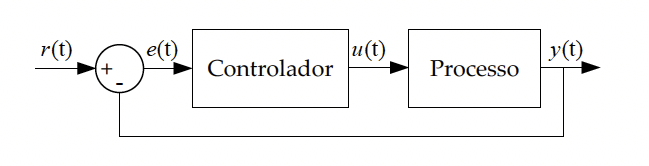

# **Planta encontrada usando Identificação de sistema**

<br>



$$
    H(z) = \frac{0.001531z + 0.04319}{z^{2} - 0,618z - 0,07443} \quad dt=0.019999999999999657
$$


# **Simulação do Sistema em Malha Fechada**

In [23]:
# !pip install control -q

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
from scipy.signal import square
from control.matlab import *

%config InlineBackend.figure_format='retina'

### Dados do ensaio

In [62]:
dados_malha_fechada_p = pd.read_csv("controle_P_dados_motorgerador.csv",
                                 header = None, sep=';').values

dados_malha_fechada_p

array([[ 0.   ,  0.   ,  0.   ,  7.5  ,  2.266],
       [ 0.02 ,  0.   ,  0.   ,  7.5  ,  2.266],
       [ 0.04 ,  0.   ,  0.05 ,  7.5  ,  2.266],
       ...,
       [ 7.94 , -0.5  ,  2.07 ,  5.828,  1.766],
       [ 7.96 , -0.5  ,  2.06 ,  5.883,  1.766],
       [ 7.98 , -0.5  ,  2.04 ,  5.993,  1.766]])

In [64]:
# Dados ensaio em malha fechada controlador proporcional
tempo_controle_p = np.array(dados_malha_fechada_p[:,0])
referencia_controlador_p  = np.array(dados_malha_fechada_p[:,1])
sinal_saida_controlador_p = np.array(dados_malha_fechada_p[:,2])
sinal_controle_controlador_p = np.array(dados_malha_fechada_p[:,3])
referencia_offeset_controlador_p = np.array(dados_malha_fechada_p[:,4])

In [65]:
dt=0.019999999999999657

num_g = [0.001531, 0.04319]
den_g = [1, -0.618, -0.07443]

Gz = ct.tf(num_g, den_g, dt)
Gz

TransferFunction(array([0.001531, 0.04319 ]), array([ 1.     , -0.618  , -0.07443]), 0.019999999999999657)

In [142]:
K = 7.5

H = ct.feedback(K*Gz, 1, sign=-1)
C = ct.feedback(K, Gz, sign=-1)

_, saida_yh = ct.forced_response(H, T=tempo_ensaio,
                                 U=referencia_controlador_p)
_, saida_yc = ct.forced_response(C, T=tempo_ensaio,
                                 U=referencia_controlador_p)

In [143]:
def plot_saida(saida_ensaio, saida_simu):
    plt.figure(figsize=(12, 6))
    plt.subplot(211)
    plt.plot(tempo_controle_p[50:],
         referencia_controlador_p[50:], c = 'g',
         label = "Sinal de Entrada PRBS")
    plt.plot(tempo_controle_p[50:],
            saida_ensaio[50:] - (np.mean(saida_ensaio[50:])),
            c = 'r', label = "Sinal de Saída - Ensaio")
    plt.plot(tempo_controle_p[50:], saida_simu[50:]- (np.mean(saida_simu[50:])),
            c = 'b', label = "Sinal de Saída - Simulação")
    plt.xticks(range(0, 12))
    plt. title('Ensaio PRBS', fontsize=12)
    plt.ylabel('Tensão (V)', fontsize=10)
    plt.xlabel('tempo (s)', fontsize=10)
    plt.legend(fontsize=10, loc="center right")

    plt.grid(which='both')
    plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
    plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

    plt.show()

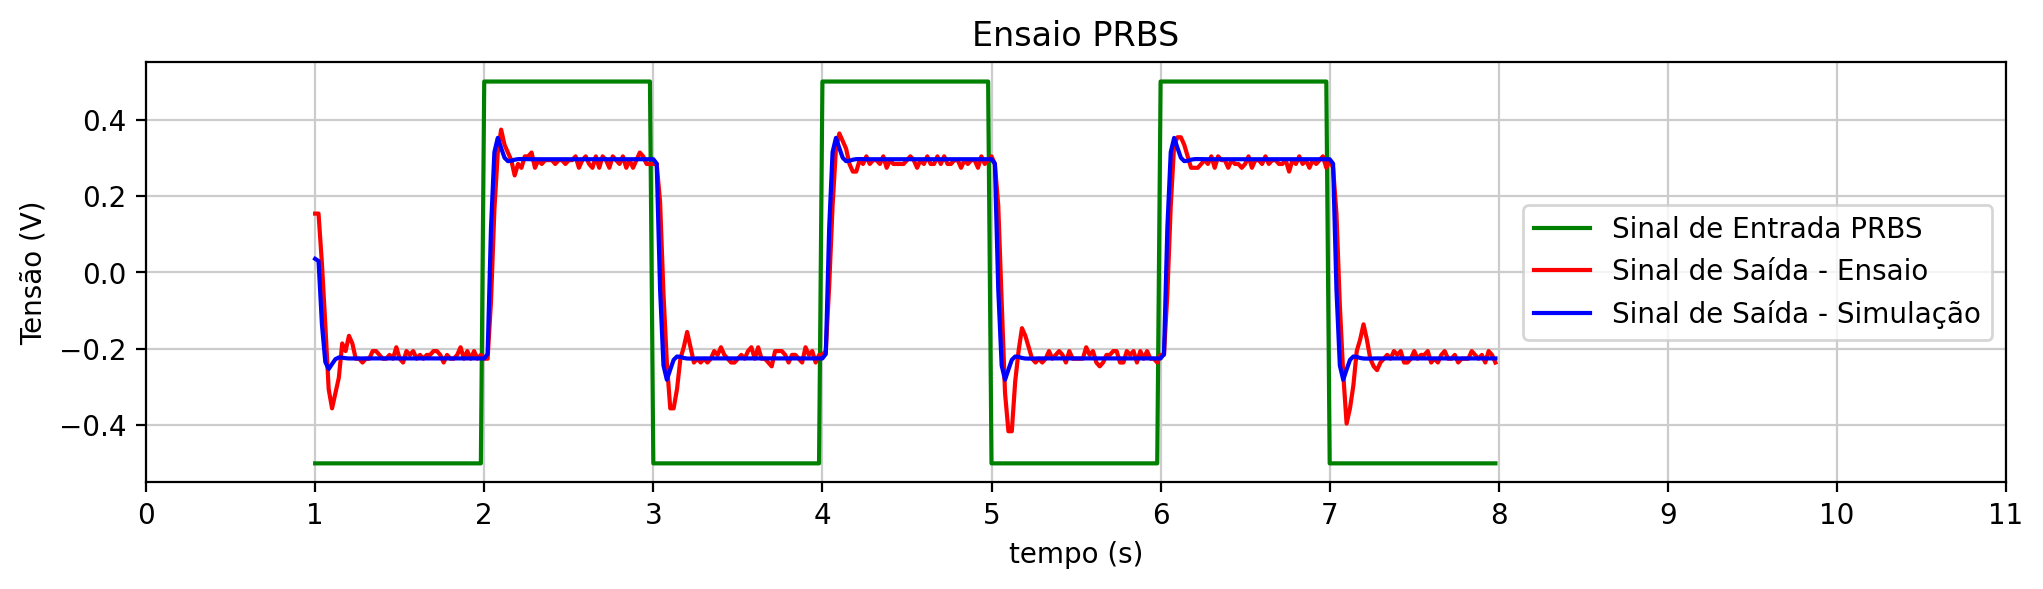

In [144]:
plot_saida(sinal_saida_controlador_p, saida_yh)

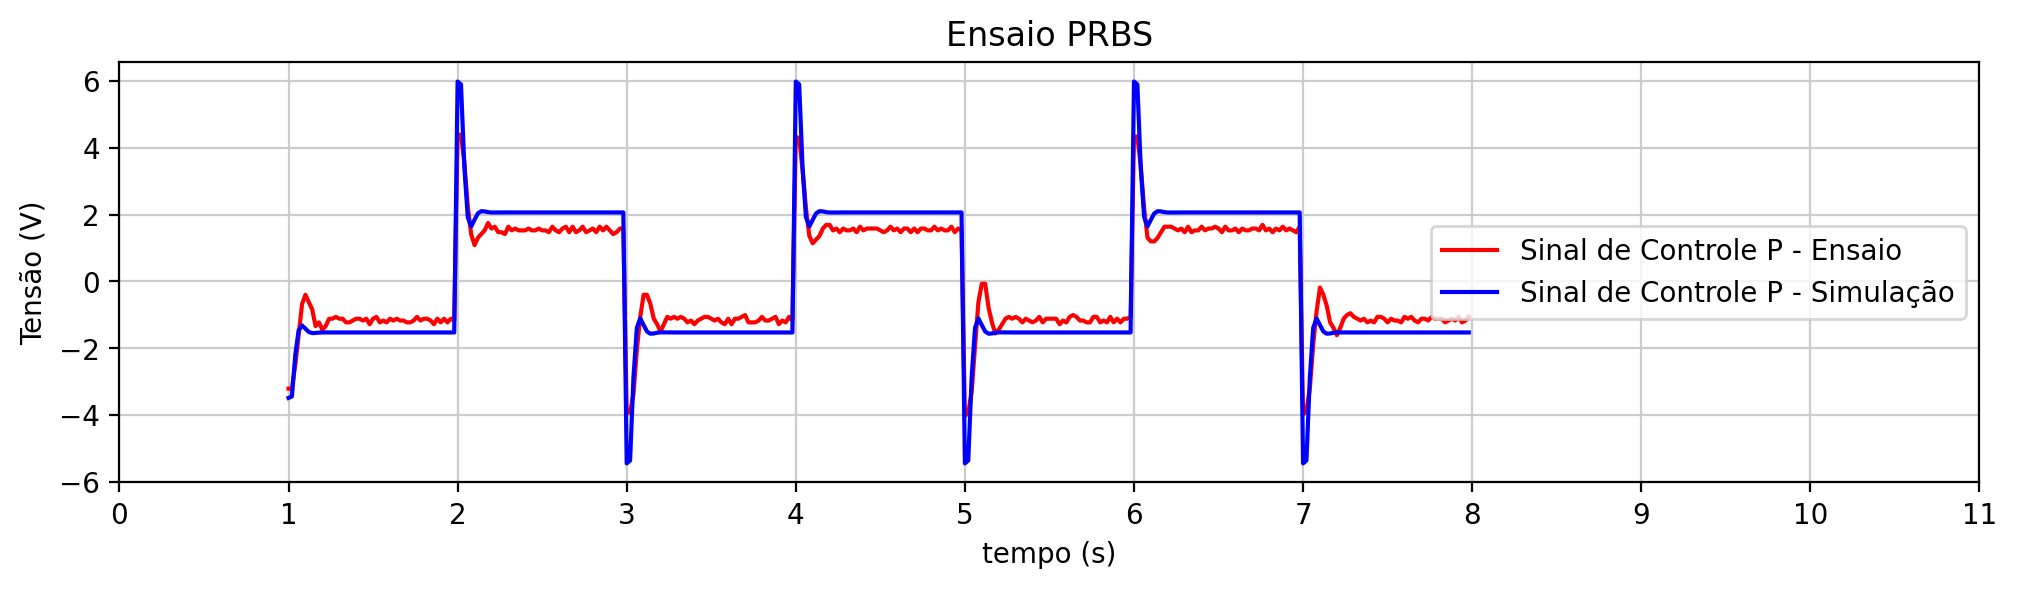

In [145]:

plt.figure(figsize=(12, 6))
plt.subplot(211)

plt.plot(tempo_controle_p[50:],
         sinal_controle_controlador_p[50:]-np.mean(sinal_controle_controlador_p[50:]),
         c = 'r', label = "Sinal de Controle P - Ensaio")
plt.plot(tempo_controle_p[50:],
         saida_yc[50:]-np.mean(saida_yc[50:]),
         c = 'b', label = "Sinal de Controle P - Simulação")
plt.xticks(range(0, 12))

plt. title('Ensaio PRBS', fontsize=12)
plt.ylabel('Tensão (V)', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10, loc="center right")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

O Controlador P consegue aproximar o sinal de saída da referência, porém sem zera o erro, podemos observar que o sistema real se comporta como na simulação, isso evidencia que a modelagem e aplicação do controle Proporcional foi bem-sucedida.

# **Lugar Geométrico das Raízes - LGR**

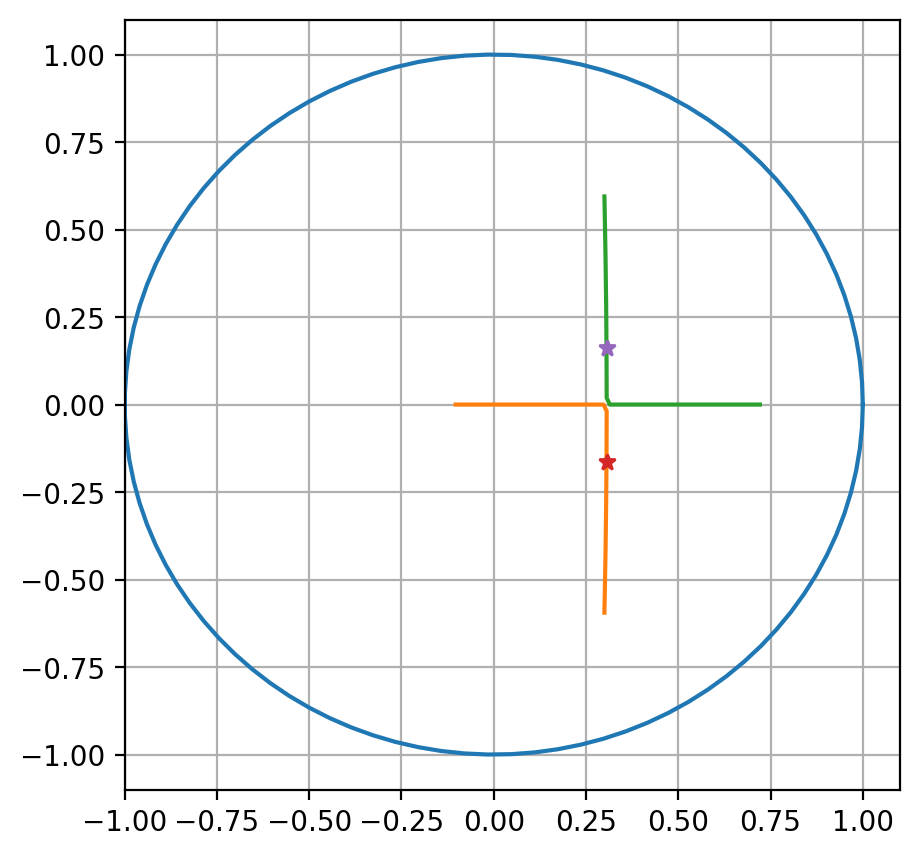

In [146]:
kvect = np.arange(0,12,0.01)
rlist,_ = ct.rlocus(Gz, kvect=kvect, plot = False)

teta = np.linspace(0,2*np.pi,100)
K = 4.5
plt.figure(figsize=(5, 5))
plt.plot(np.cos(teta),np.sin(teta))
plt.plot(np.real(rlist[:]),np.imag(rlist[:]))
plt.plot(np.real(rlist[kvect==K]),np.imag(rlist[kvect==K]), '*')
plt.axis([-1,1.1,-1.1,1.1])
plt.grid()
plt.show()

A partir do LGR podemos observar que o sistema possui polos dentro do circulo unitário, isso mostra que o sistema é estável. além disso, vemos que o LGR 

---

# **Projeto do Controlador PI**


In [147]:
dados_malha_fechada_pi = pd.read_csv("controle_PI_dados_motorgerador.csv",
                                 header = None, sep=';').values

dados_malha_fechada_pi

array([[ 0.      ,  0.      ,  0.      ,  2.766   ,  7.5     ,  2.266   ],
       [ 0.02    ,  0.      ,  0.      ,  2.766   ,  7.5     ,  2.266   ],
       [ 0.04    ,  0.      ,  0.06    ,  2.706   ,  7.5     ,  2.266   ],
       ...,
       [ 7.94    , -0.5     ,  1.78    , -0.014   , -2.534986,  1.766   ],
       [ 7.96    , -0.5     ,  1.79    , -0.024   , -2.574048,  1.766   ],
       [ 7.98    , -0.5     ,  1.78    , -0.014   , -2.57576 ,  1.766   ]])

In [148]:
# Dados ensaio em malha fechada controlador proporcional integral
tempo_controle_pi = np.array(dados_malha_fechada_pi[:,0])
referencia_controlador_pi  = np.array(dados_malha_fechada_pi[:,1])
sinal_saida_controlador_pi = np.array(dados_malha_fechada_pi[:,2])
sinal_controle_controlador_pi = np.array(dados_malha_fechada_pi[:,4])
referencia_offeset_controlador_pi = np.array(dados_malha_fechada_pi[:,5])

In [149]:

Gc = ct.tf([2.404, -1.331], [1, -1], dt)
Gc

TransferFunction(array([ 2.404, -1.331]), array([ 1, -1]), 0.019999999999999657)

In [150]:
Gz

TransferFunction(array([0.001531, 0.04319 ]), array([ 1.     , -0.618  , -0.07443]), 0.019999999999999657)

### **Controlador PI**

In [151]:
K = 2.404
a = 1.331

Gpi = ct.tf([K, -a], [1, -1], dt)
Gpi

TransferFunction(array([ 2.404, -1.331]), array([ 1, -1]), 0.019999999999999657)

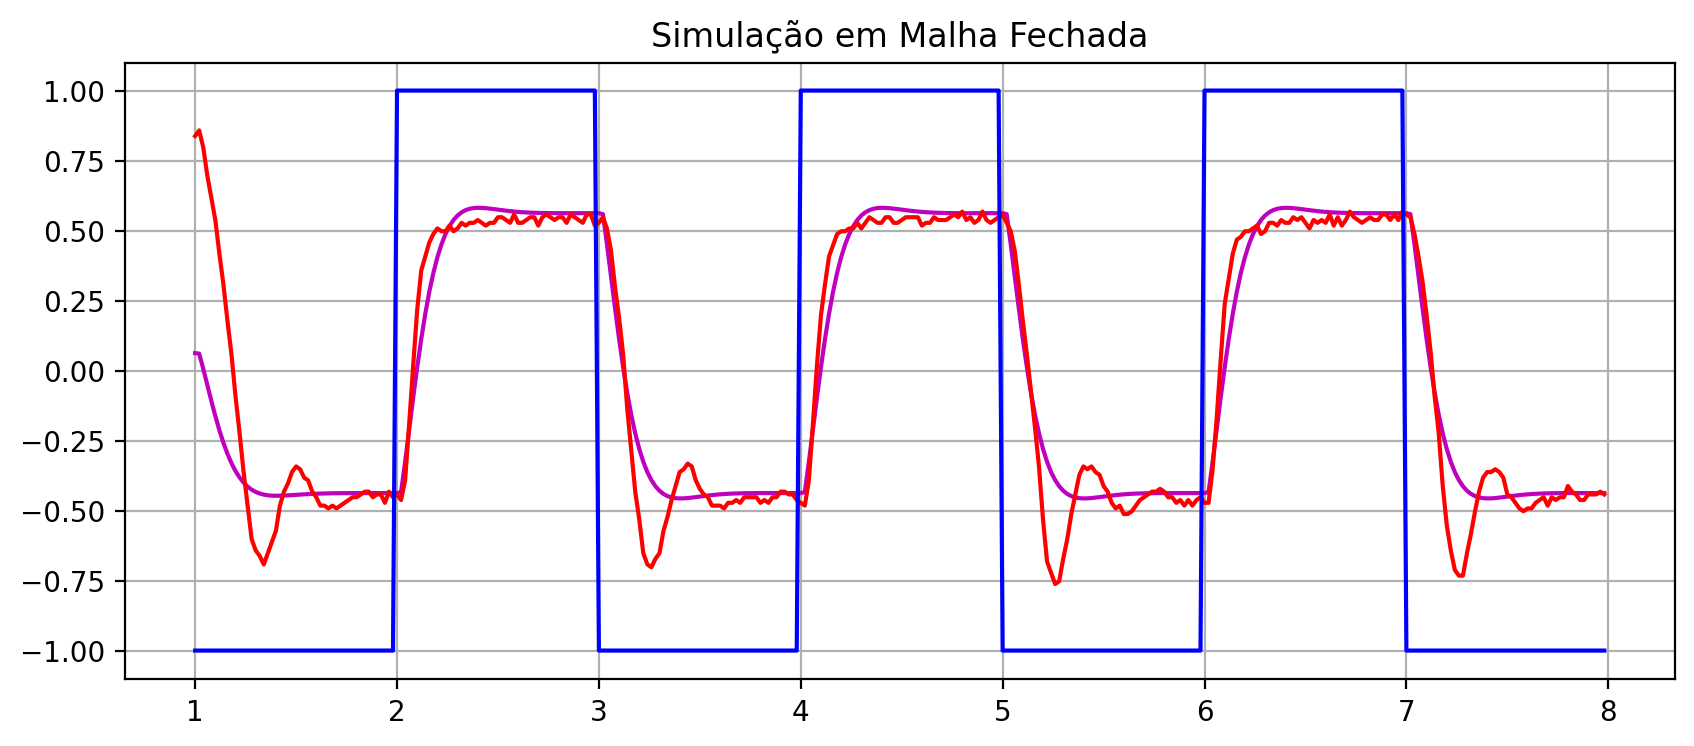

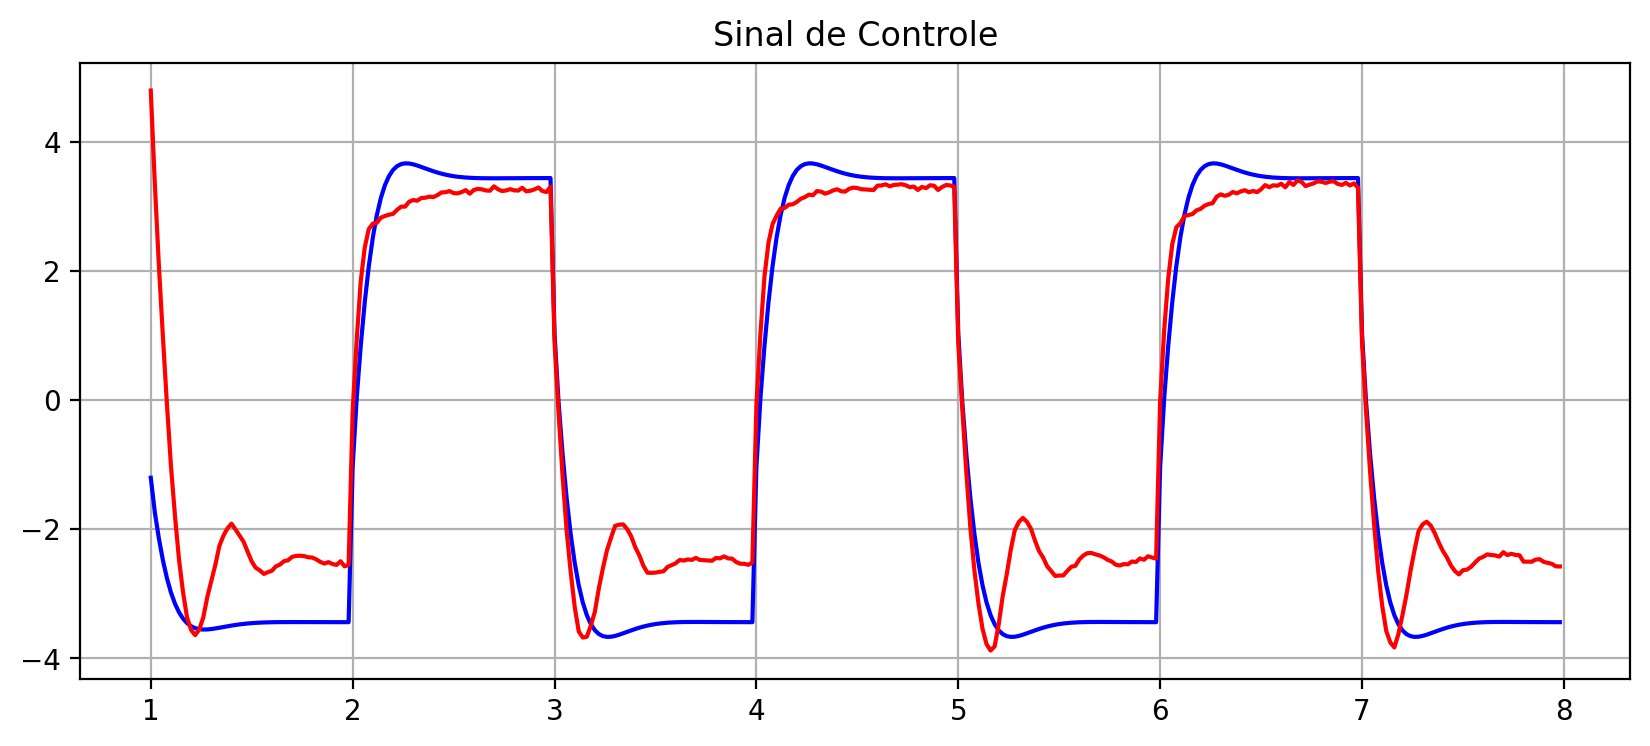

In [152]:

H_pi = ct.feedback(Gpi*Gz, 1, sign = -1)
C_pi = ct.feedback(Gpi, Gz, sign = -1)

t, ymf_pi = ct.forced_response(H_pi, U = referencia_controlador_pi)
t1, u_pi = ct.forced_response(C_pi, U = referencia_controlador_pi)

plt.figure(figsize=(10, 4))
# plt.plot(tempo,ym,'k' ,tempo,y,'r')
plt.plot(tempo_controle_pi[50:], ymf_pi[50:] - (np.mean(ymf_pi[50:])), 'm')
plt.plot(tempo_controle_pi[50:],
         sinal_saida_controlador_pi[50:] - (np.mean(sinal_saida_controlador_pi[50:])),
         c = 'r', label = "Sinal de Saída")
plt.plot(tempo_controle_pi[50:], sinal_entrada_ensaio[50:] - 7.5, 'b')
plt.title("Simulação em Malha Fechada")
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(tempo_controle_pi[50:], u_pi[50:], 'b')
plt.plot(tempo_controle_pi[50:], sinal_controle_controlador_pi[50:], 'r')
plt.title("Sinal de Controle")
plt.grid()
plt.show()

POdemos observar que o sistema nos picos superior e inferior possui uma dinâmica diferente do sistema identificado, isso pode ser por conta da aproximação feita para o sistema, além disso, percebemos na prática que o sistema só pode ser controlado na aceleração positiva do motor/gerado, assim, por outro lado a desaceleração é feita pela própria inercia do sistema, sem a presença do controlador, por isso o sistema se comporta de forma diferente do simulado e vemos uma oscilação no decaimento.

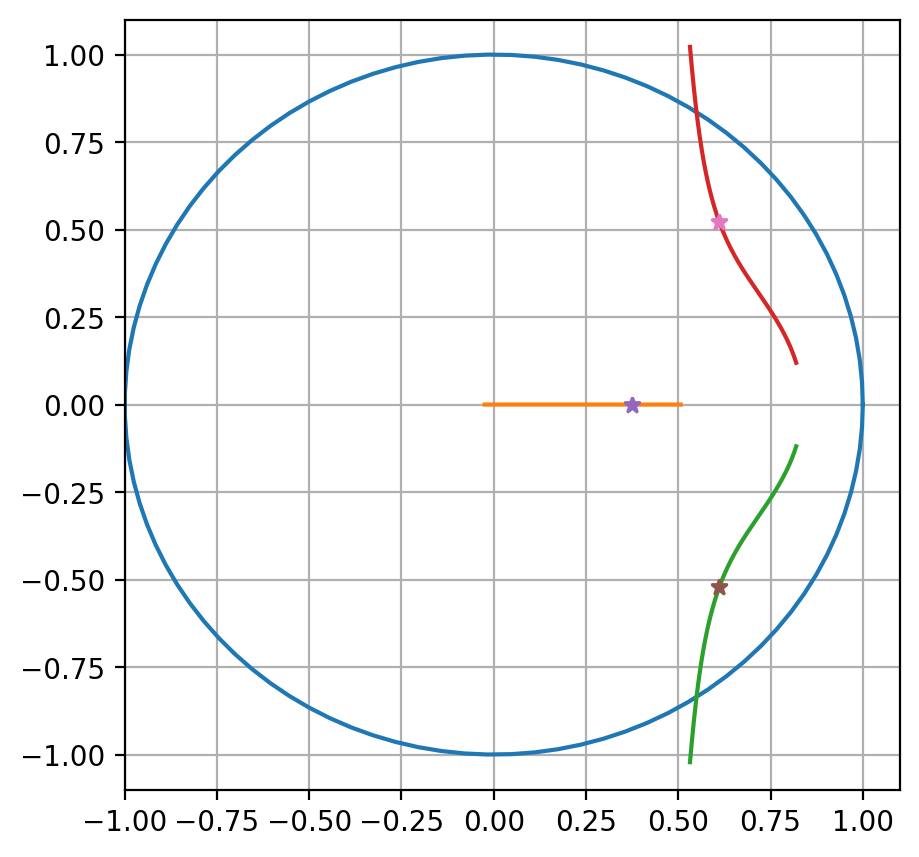

In [153]:
kvect = np.arange(0, 12, 0.01)
rlist,_ = ct.rlocus(H_pi, kvect=kvect, plot = False)

teta = np.linspace(0,2*np.pi,100)
K = 4.5
plt.figure(figsize=(5, 5))
plt.plot(np.cos(teta),np.sin(teta))
plt.plot(np.real(rlist[:]),np.imag(rlist[:]))
plt.plot(np.real(rlist[kvect==K]),np.imag(rlist[kvect==K]), '*')
plt.axis([-1,1.1,-1.1,1.1])
plt.grid()
plt.show()

In [154]:
Gpi

TransferFunction(array([ 2.404, -1.331]), array([ 1, -1]), 0.019999999999999657)

$$\frac{U(z)}{E(z)} = \frac{b_0 z + b_1}{z - 1} \frac{z^{-1}}{z^{-1}} $$


Equação de Diferenças:

$$ u(k) = u(k-1) + b_0 e(k) + b_1 e(k-1)$$

$$ u(k) = u(k-1) + 2,404 e(k) - 1,331e(k-1)$$



$$ $$